In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import pandas as pd
import numpy as np
import sklearn as sk

In [ ]:
# feature engineering and additonal data to visualize. find uber and lyft data sets to visualize. 

In [ ]:
# use smote to balance dataset. research oversampling and undersampling. New techniques that we learnt and that we 
# implemented. be creative.

In [ ]:
# what kind of visualizations would be a little more distinctive. Income. Housing. Education. What are the external
# factors besides income that determine whether the housing is approved. Try to isolate things and see what happens
# holding income constant, do other things matter. Are there other things that can be predicted.

In [ ]:
# Add something to this

In [ ]:
# Create a form

In [ ]:
# Go to Tableau public and see what work has been done before. Use as inspiration and work cited. Make it very
# professional, and try to make this a little bit more out of the box. Perhaps add in another data source. Try
# to make it more complex and more creative. Design of the web app and machine learning integration. This is a very
# common dataset. Try to make this stand out. Don't copy paste code, and don't copy paste visuals. Try to make this
# unique and make it yours. Try to make some different ways to do this than has done before.

In [ ]:
# make it a little different.

In [3]:
dfloan = pd.read_csv("loan_data/loan_data.csv")
dfloan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


C:\Users\sajid\AppData\Local\Temp\ipykernel_780\3014304146.py:1: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  dfloan = pd.read_csv("loan_data/loan_data.csv")


In [4]:
pd.set_option('display.max_columns', None)
dfloan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [5]:
cols = []
for col in dfloan.columns:
    print(f'{col}: {dfloan[col].isnull().sum()}')
    if dfloan[col].isnull().sum() < 25000:
        cols.append(col)

id: 0
member_id: 0
loan_amnt: 0
funded_amnt: 0
funded_amnt_inv: 0
term: 0
int_rate: 0
installment: 0
grade: 0
sub_grade: 0
emp_title: 2459
emp_length: 1075
home_ownership: 0
annual_inc: 0
verification_status: 0
issue_d: 0
loan_status: 0
pymnt_plan: 0
url: 0
desc: 12940
purpose: 0
title: 11
zip_code: 0
addr_state: 0
dti: 0
delinq_2yrs: 0
earliest_cr_line: 0
inq_last_6mths: 0
mths_since_last_delinq: 25682
mths_since_last_record: 36931
open_acc: 0
pub_rec: 0
revol_bal: 0
revol_util: 50
total_acc: 0
initial_list_status: 0
out_prncp: 0
out_prncp_inv: 0
total_pymnt: 0
total_pymnt_inv: 0
total_rec_prncp: 0
total_rec_int: 0
total_rec_late_fee: 0
recoveries: 0
collection_recovery_fee: 0
last_pymnt_d: 71
last_pymnt_amnt: 0
next_pymnt_d: 38577
last_credit_pull_d: 2
collections_12_mths_ex_med: 56
mths_since_last_major_derog: 39717
policy_code: 0
application_type: 0
annual_inc_joint: 39717
dti_joint: 39717
verification_status_joint: 39717
acc_now_delinq: 0
tot_coll_amt: 39717
tot_cur_bal: 39717
ope

In [7]:
dfl1 = dfloan.loc[:, cols]
dfl1.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'collections_12_mths_ex_med', 'policy_code',
       'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths',
       'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

In [9]:
dfl1 = dfl1.drop('desc', axis=1)
dfl1 = dfl1.dropna()

In [11]:
dfl1.shape

(36431, 53)

In [10]:
dfl1.loan_status.value_counts()

Fully Paid     30423
Charged Off     4942
Current         1066
Name: loan_status, dtype: int64

In [12]:
drop_indices = list(dfl1.loc[dfl1.loan_status == 'Current'].index)
dfl1 = dfl1.drop(drop_indices)
dfl1 = dfl1.reset_index(drop=True)

In [23]:
dfl2 = dfl1.copy()
# dfl2.info()

In [15]:
dfl2.to_csv('loan_data/loan_data1.csv')

In [24]:
dfl2.member_id.nunique()

35365

In [25]:
amnts = pd.DataFrame(dfl2.loan_amnt - dfl2.funded_amnt_inv)
amnts.columns = ['diff']

mask = amnts['diff'] > 1000
amnts.loc[mask]

,diff
16,1107.83892
56,3575.00000
60,7425.00000
70,12950.00000
84,7225.00000
...,...
35360,5900.22000
35361,11275.00000
35362,11375.00000
35363,3700.00000


In [18]:
amnts.describe()

,diff
count,35365.000000
mean,705.497716
std,2244.921781
min,0.000000
25%,0.000000
50%,2.365760
75%,200.000000
max,32474.996081


In [26]:
sub_grade_dict = {}
counter = 1
for let in ['A', 'B', 'C', 'D', 'E','F','G']:
    for num in np.arange(1,6):
        subgra = let+str(num)
        sub_grade_dict[subgra] = counter
        counter = counter+2

keyss = list(sub_grade_dict.keys())

In [29]:
# for i in range(len(dfl2)):
#     key = dfl2.iloc[i,9]
#     dfl2.iloc[i,9] = sub_grade_dict[key]

# dfl2.sub_grade = dfl2.sub_grade.astype('int')
# dfl2.sub_grade.value_counts()

In [30]:
dfl2.term = [int(term.split(' ')[1]) for term in dfl2.term.tolist()]

In [31]:
dfl2.int_rate = [float(rate.strip('%')) for rate in dfl2.int_rate.tolist()]

In [32]:
dfl2 = dfl2.drop(['member_id', 'grade'], axis=1)

In [33]:
dfl2 = dfl2.drop('emp_title', axis=1)

In [34]:
dfl2.emp_length = dfl2.emp_length.replace('10+ years', '10 years')

In [35]:
dfl2.emp_length = dfl2.emp_length.replace('< 1 year', '0 years')

In [36]:
dfl2.emp_length = [int(lenth.split(' ')[0]) for lenth in dfl2.emp_length]

In [37]:
dfl2 = dfl2.reset_index(drop=True)

In [38]:
issue_d_list = list(dfl2.issue_d.unique())

In [39]:
issue_d_dict = {}
counter = 1
for d in issue_d_list:
    issue_d_dict[d] = counter
    counter += 1
#issue_d_dict

In [40]:
for i in range(len(dfl2)):
    key = dfl2.iloc[i,12]
    dfl2.iloc[i,12] = issue_d_dict[key]

In [41]:
dfl2.issue_d = dfl2.issue_d.astype('int')

In [43]:
dfl2.loan_status = dfl2.loan_status.replace('Fully Paid', 0)
dfl2.loan_status = dfl2.loan_status.replace('Charged Off', 1)

In [44]:
dfl2.loan_status.value_counts()

0    30423
1     4942
Name: loan_status, dtype: int64

In [45]:
dfl2 = dfl2.drop('pymnt_plan', axis=1)

In [46]:
dfl2 = dfl2.drop('url', axis=1)

In [47]:
dfl2.purpose = dfl2.purpose.replace('renewable_energy','other')

In [48]:
dfl2 = dfl2.drop('title', axis=1)

In [49]:
# create Federal Reserve State Regions

fed_reserve_dict = {'1':['ME','VT', 'NH', 'MA', 'CT', 'RI'],
                    '2':['NY'],
                    '3':['PA', 'NJ'],
                    '4':['OH'],
                    '5':['MD', 'DE', 'VA', 'WV', 'NC', 'SC', 'DC'],
                    '6':['FL', 'TN', 'GA', 'AL', 'MS'],
                    '7':['MI', 'WI', 'IL', 'IN', 'IA'],
                    '8':['AR', 'MO', 'KY'],
                    '9':['MN', 'ND', 'SD', 'MT'],
                    '10':['WY', 'CO', 'KS', 'NE', 'OK'],
                    '11':['TX', 'NM', 'LA'],
                    '12':['CA', 'AZ', 'NV', 'OR', 'WA', 'ID', 'UT', 'HI', 'AK']}

In [50]:
fed_reserve_inv_dict ={}
for key in list(fed_reserve_dict.keys()):
    for state in fed_reserve_dict[key]:
        fed_reserve_inv_dict[state] = key

In [51]:
dfl2 = dfl2.drop('zip_code', axis=1)

In [52]:
fed_reserve_region_list = []
for index in dfl2.index:
    state = dfl2.loc[index, 'addr_state']
    fed_reserve_region_list.append(fed_reserve_inv_dict[state])

In [53]:
dfl2['fed_reserve_region'] = pd.Series(fed_reserve_region_list)

In [54]:
dfl2 = dfl2.drop('addr_state', axis=1)

In [55]:
dfl2 = dfl2.drop('earliest_cr_line', axis=1)

In [56]:
dfl2 = dfl2.drop('pub_rec', axis=1)

In [57]:
revol_util_list = []
for rate in list(dfl2.revol_util):
    rate_proper = round(float(rate.strip('%'))/100, 2)
    revol_util_list.append(rate_proper)

In [58]:
dfl2['revol_util'] = pd.Series(revol_util_list)

In [59]:
dfl2 = dfl2.drop('initial_list_status', axis = 1)

In [60]:
dfl2 = dfl2.drop('tax_liens', axis = 1)

In [61]:
dfl2.pub_rec_bankruptcies = dfl2.pub_rec_bankruptcies.replace(2,1)

In [66]:
dfl2.pub_rec_bankruptcies.value_counts()

0.0    33898
1.0     1467
Name: pub_rec_bankruptcies, dtype: int64

In [62]:
dfl2 = dfl2.drop('delinq_amnt', axis=1)

In [63]:
dfl2 = dfl2.drop('chargeoff_within_12_mths', axis=1)

In [64]:
dfl2.acc_now_delinq.value_counts()

0    35365
Name: acc_now_delinq, dtype: int64

In [65]:
dfl2.application_type.value_counts()

INDIVIDUAL    35365
Name: application_type, dtype: int64

In [66]:
dfl2.policy_code.value_counts()

1    35365
Name: policy_code, dtype: int64

In [67]:
dfl2.collections_12_mths_ex_med.value_counts()

0.0    35365
Name: collections_12_mths_ex_med, dtype: int64

In [68]:
dfl2 = dfl2.drop(['acc_now_delinq', 'application_type', 'policy_code', 'collections_12_mths_ex_med'], axis=1)

In [69]:
dfl2 = dfl2.drop(['out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt',], axis=1)

In [70]:
dfl2 = dfl2.drop(['funded_amnt', 'funded_amnt_inv'], axis=1)

In [72]:
dfl3 = dfl2.copy()

In [71]:
dfl2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35365 entries, 0 to 35364
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    35365 non-null  int64  
 1   loan_amnt             35365 non-null  int64  
 2   term                  35365 non-null  int64  
 3   int_rate              35365 non-null  float64
 4   installment           35365 non-null  float64
 5   sub_grade             35365 non-null  int32  
 6   emp_length            35365 non-null  int64  
 7   home_ownership        35365 non-null  object 
 8   annual_inc            35365 non-null  float64
 9   verification_status   35365 non-null  object 
 10  issue_d               35365 non-null  int32  
 11  loan_status           35365 non-null  int64  
 12  purpose               35365 non-null  object 
 13  dti                   35365 non-null  float64
 14  delinq_2yrs           35365 non-null  int64  
 15  inq_last_6mths     

In [438]:
dfl2.last_credit_pull_d = dfl2backup.last_credit_pull_d.copy()

In [73]:
last_credit_pull_d_list = list(dfl2.last_credit_pull_d)

In [74]:
month_dict = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 
             'Nov': 11, 'Dec': 12}

In [75]:
credit_pull_dates_dict = {}

sep_date = last_credit_pull_d_list[0].split('-')
month = sep_date[0]
year = sep_date[1]

credit_pull_dates_dict['year'] = ['20'+year]
credit_pull_dates_dict['month'] = [month_dict[month]]

for i in np.arange(1, len(last_credit_pull_d_list)):
    sep_date = last_credit_pull_d_list[i].split('-')
    month = sep_date[0]
    year = sep_date[1]
    
    credit_pull_dates_dict['year'].append('20'+year)
    credit_pull_dates_dict['month'].append(month_dict[month])

In [76]:
len(credit_pull_dates_dict['year'])

35365

In [77]:
dfpull_dates = pd.DataFrame(credit_pull_dates_dict)
dfpull_dates['day'] = '1'

In [78]:
dfl2.index

RangeIndex(start=0, stop=35365, step=1)

In [79]:
credit_pull_datetime = pd.to_datetime(dfpull_dates)

In [81]:
index_list = dfl2.index.tolist()

In [83]:
credit_pull_datetime.index = index_list

In [84]:
dfl2['last_credit_pull_datetime'] = credit_pull_datetime

In [85]:
dfl2.last_credit_pull_d

0        Sep-13
1        Apr-16
2        Jan-16
3        May-16
4        Dec-14
          ...  
35360    May-16
35361    Oct-15
35362    May-14
35363    Aug-08
35364    May-16
Name: last_credit_pull_d, Length: 35365, dtype: object

In [86]:
dfl2.last_credit_pull_datetime

0       2013-09-01
1       2016-04-01
2       2016-01-01
3       2016-05-01
4       2014-12-01
           ...    
35360   2016-05-01
35361   2015-10-01
35362   2014-05-01
35363   2008-08-01
35364   2016-05-01
Name: last_credit_pull_datetime, Length: 35365, dtype: datetime64[ns]

In [87]:
last_credit_pull_int = [int((dt.split('-')[0]+dt.split('-')[1])) for dt in list(dfl2.last_credit_pull_datetime.astype('str'))]

In [88]:
len(pd.Series(last_credit_pull_int))

35365

In [89]:
last_credit_pull_int_series = pd.Series(last_credit_pull_int)

In [90]:
last_credit_pull_int_series.index = index_list

In [91]:
dfl2['last_credit_pull_d_int'] = last_credit_pull_int_series

In [92]:
dfl2.last_credit_pull_d_int

0        201309
1        201604
2        201601
3        201605
4        201412
          ...  
35360    201605
35361    201510
35362    201405
35363    200808
35364    201605
Name: last_credit_pull_d_int, Length: 35365, dtype: int64

In [93]:
dfl2backup = dfl2.copy()

In [140]:
dfl2backup.to_csv('loan_data/loan_data_clean.csv', index=False)

In [139]:
dfl2backup['last_credit_pull_datetime'] = credit_pull_datetime

In [141]:
dfl2tableau = dfl2backup.copy()

In [145]:
dfl2tableau = dfl2tableau.drop('last_credit_pull_d_int', axis=1)

In [151]:
dfl2tableau['grade'] = dfl1.grade
dfl2tableau['sub_grade'] = dfl1.sub_grade
dfl2tableau['loan_status'] = dfl1.loan_status

In [154]:
dfl2tableau['addr_state'] = dfl1.addr_state

In [156]:
dfl2tableau['issue_d'] = dfl1.issue_d

In [157]:
dfl2tableau.to_csv('loan_data/loan_data_tableau.csv', index=False)

In [150]:
dfl1.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

In [152]:
dfl2tableau.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35365 entries, 0 to 35364
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   id                         35365 non-null  int64         
 1   loan_amnt                  35365 non-null  int64         
 2   term                       35365 non-null  int64         
 3   int_rate                   35365 non-null  float64       
 4   installment                35365 non-null  float64       
 5   sub_grade                  35365 non-null  object        
 6   emp_length                 35365 non-null  int64         
 7   home_ownership             35365 non-null  object        
 8   annual_inc                 35365 non-null  float64       
 9   verification_status        35365 non-null  object        
 10  issue_d                    35365 non-null  int32         
 11  loan_status                35365 non-null  object        
 12  purp

In [94]:
dfl2 = dfl2.drop(['last_credit_pull_datetime', 'last_credit_pull_d'], axis=1)

In [95]:
dfl2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35365 entries, 0 to 35364
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      35365 non-null  int64  
 1   loan_amnt               35365 non-null  int64  
 2   term                    35365 non-null  int64  
 3   int_rate                35365 non-null  float64
 4   installment             35365 non-null  float64
 5   sub_grade               35365 non-null  int32  
 6   emp_length              35365 non-null  int64  
 7   home_ownership          35365 non-null  object 
 8   annual_inc              35365 non-null  float64
 9   verification_status     35365 non-null  object 
 10  issue_d                 35365 non-null  int32  
 11  loan_status             35365 non-null  int64  
 12  purpose                 35365 non-null  object 
 13  dti                     35365 non-null  float64
 14  delinq_2yrs             35365 non-null

In [96]:
dfl2.loan_status.value_counts()

0    30423
1     4942
Name: loan_status, dtype: int64

In [97]:
object_cols = []
for col in dfl2.columns:
    if dfl2[col].dtype == 'O':
        object_cols.append(col)
object_cols

['home_ownership', 'verification_status', 'purpose', 'fed_reserve_region']

In [98]:
df_categ = dfl2.loc[:, object_cols]
df_numeric = dfl2.drop(object_cols, axis=1)


In [99]:
df_numeric = df_numeric.drop('id', axis=1)

In [100]:
df_numeric

,loan_amnt,term,int_rate,installment,sub_grade,emp_length,annual_inc,issue_d,loan_status,dti,delinq_2yrs,inq_last_6mths,open_acc,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,last_credit_pull_d_int
0,2500,60,15.27,59.83,27,0,30000.00,1,1,1.00,0,5,3,1687,0.09,4,0.0,201309
1,10000,36,13.49,339.31,21,10,49200.00,1,0,20.00,0,1,10,5598,0.21,37,0.0,201604
2,5000,36,7.90,156.46,7,3,36000.00,1,0,11.20,0,3,9,7963,0.28,12,0.0,201601
3,7000,60,15.96,170.08,29,8,47004.00,1,0,23.51,0,1,7,17726,0.86,11,0.0,201605
4,3000,36,18.64,109.43,41,9,48000.00,1,0,5.35,0,2,4,8221,0.88,4,0.0,201412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35360,7500,36,9.83,241.41,15,7,96000.00,48,0,2.69,0,0,4,1944,0.47,11,1.0,201605
35361,12000,36,9.01,381.66,13,6,100671.39,49,0,6.64,0,0,16,7606,0.19,39,1.0,201510
35362,12375,36,10.91,404.62,25,2,80000.00,49,0,9.23,0,0,4,13126,0.96,4,1.0,201405
35363,4800,36,10.28,155.52,21,1,35000.00,50,0,7.51,0,0,11,5836,0.69,12,1.0,200808


In [101]:
df_categ_one_hot = pd.get_dummies(df_categ)

In [102]:
df_final = pd.concat([df_numeric, df_categ_one_hot], axis=1)

In [158]:
df_final.to_csv('loan_data/ml_read_loan_data.csv', index=False)

In [103]:
len(df_final.columns)

50

In [104]:
# Data Science Libs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# model preprocessing & metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

# algorithm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [105]:
def evaluateModel(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train) # fit
    
    train_preds = model.predict(X_train) # predict
    test_preds = model.predict(X_test)
    test_proba = model.predict_proba(X_test)
    
    output_train = f"""
    METRICS FOR THE TRAINING SET:
    ----------------------------
    {confusion_matrix(y_train, train_preds)}

    {classification_report(y_train, train_preds)}
    """
    print(output_train)

    #################################################

    output_test = f"""
    METRICS FOR THE TESTING SET:
    ----------------------------
    {confusion_matrix(y_test, test_preds)}

    {classification_report(y_test, test_preds)}
    """
    print(output_test)
    print()
    
    #################################################
    
    fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, test_proba[:,1])

    roc_auc_knn = auc(fpr_knn, tpr_knn)
    print(f"AUC for the Model Test Set: {roc_auc_knn}")

    # make plot
    plt.figure(figsize=(10,6))
    plt.plot(fpr_knn, tpr_knn, color='darkorange')
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()
    
    print("Brier Score:")
    print(sum((y_test - test_proba[:,1])**2))

In [106]:
from sklearn.model_selection import train_test_split

X = df_final.drop('loan_status', axis=1)
y = df_final.loc[:, ["loan_status"]].values.ravel()

In [107]:
from imblearn.over_sampling import SMOTE
seed = 100
k = 3

sm = SMOTE(sampling_strategy='auto', k_neighbors=k, random_state=seed)
X_smote, y_smote = sm.fit_resample(X, y)

In [108]:
# Split the preprocessed data into a training and testing dataset
#  YOUR CODE GOES HERE

X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=.25, random_state=22) # use stratify for classification models
print(f"{round(len(X_train)/len(X_smote), 3)} : {round(len(X_test)/len(X_smote), 3)}")

0.75 : 0.25



    METRICS FOR THE TRAINING SET:
    ----------------------------
    [[30423     0]
 [    1 30422]]

                  precision    recall  f1-score   support

           0       1.00      1.00      1.00     30423
           1       1.00      1.00      1.00     30423

    accuracy                           1.00     60846
   macro avg       1.00      1.00      1.00     60846
weighted avg       1.00      1.00      1.00     60846

    

    METRICS FOR THE TESTING SET:
    ----------------------------
    [[7621    0]
 [   0 7591]]

                  precision    recall  f1-score   support

           0       1.00      1.00      1.00      7621
           1       1.00      1.00      1.00      7591

    accuracy                           1.00     15212
   macro avg       1.00      1.00      1.00     15212
weighted avg       1.00      1.00      1.00     15212

    

AUC for the Model Test Set: 1.0


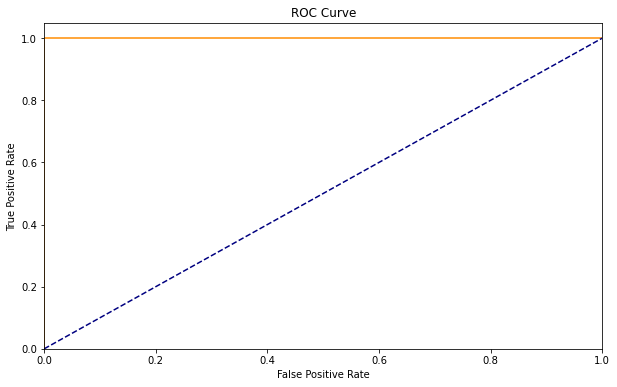

Brier Score:
138.6112000000062


In [109]:
rf = RandomForestClassifier(random_state=42, n_estimators=100)
evaluateModel(rf, X_smote, X_test, y_smote, y_test)

In [136]:
features = df_final.drop('loan_status', axis=1)
pd.Series(list(zip(rf.feature_importances_, features))).sort_values(ascending=False).reset_index(drop=True)

0                           (0.11057980727851481, term)
1                       (0.06764231458233043, int_rate)
2          (0.0474010012311593, last_credit_pull_d_int)
3                      (0.04554884183480788, sub_grade)
4                     (0.03868523631836471, annual_inc)
5     (0.03863065557261305, verification_status_Not ...
6     (0.036904739801541554, verification_status_Ver...
7                     (0.03538776301786393, revol_util)
8     (0.03515278402149406, verification_status_Sour...
9           (0.033679409489846435, home_ownership_RENT)
10                    (0.032921954753445955, revol_bal)
11                   (0.03228961508400644, installment)
12       (0.03130300948967319, home_ownership_MORTGAGE)
13                           (0.03028994054006221, dti)
14                    (0.029760346553520178, loan_amnt)
15                      (0.029347691480211043, issue_d)
16          (0.025500762757303855, purpose_credit_card)
17                    (0.024723092461648194, tot


    METRICS FOR THE TRAINING SET:
    ----------------------------
    [[30043   380]
 [ 4091 26332]]

                  precision    recall  f1-score   support

           0       0.88      0.99      0.93     30423
           1       0.99      0.87      0.92     30423

    accuracy                           0.93     60846
   macro avg       0.93      0.93      0.93     60846
weighted avg       0.93      0.93      0.93     60846

    

    METRICS FOR THE TESTING SET:
    ----------------------------
    [[7517  104]
 [ 992 6599]]

                  precision    recall  f1-score   support

           0       0.88      0.99      0.93      7621
           1       0.98      0.87      0.92      7591

    accuracy                           0.93     15212
   macro avg       0.93      0.93      0.93     15212
weighted avg       0.93      0.93      0.93     15212

    

AUC for the Model Test Set: 0.9779081993917098


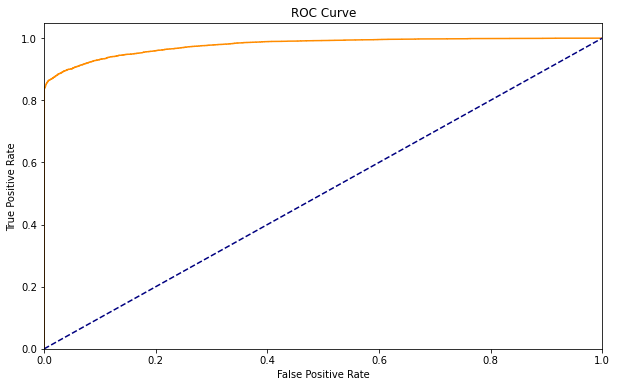

Brier Score:
804.0872676853163


In [130]:
lgb = LGBMClassifier(random_state=42)
evaluateModel(lgb, X_smote, X_test, y_smote, y_test)

In [109]:
import tensorflow as tf

In [131]:
pd.DataFrame(y_smote).value_counts()

0    30423
1    30423
dtype: int64

In [132]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
#  YOUR CODE GOES HERE

nn2 = tf.keras.models.Sequential()

# First hidden layer
#  YOUR CODE GOES HERE

nn2.add(tf.keras.layers.Dense(units=6, activation="relu", input_shape=[49]))

# Second hidden layer
#  YOUR CODE GOES HERE

nn2.add(tf.keras.layers.Dense(units=4, activation="relu"))


# Output layer
#  YOUR CODE GOES HERE

nn2.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 6)                 300       
                                                                 
 dense_10 (Dense)            (None, 4)                 28        
                                                                 
 dense_11 (Dense)            (None, 1)                 5         
                                                                 
Total params: 333
Trainable params: 333
Non-trainable params: 0
_________________________________________________________________


In [133]:
opt = tf.keras.optimizers.Adam(learning_rate=0.02)
nn2.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])
fit_model2 = nn2.fit(X_train, y_train, epochs=30, batch_size = 2048)

Epoch 1/30
23/23 [==============================] - 3s 9ms/step - loss: 3418.1458 - accuracy: 0.4943
Epoch 2/30
23/23 [==============================] - 0s 9ms/step - loss: 13.1638 - accuracy: 0.5127
Epoch 3/30
23/23 [==============================] - 0s 6ms/step - loss: 7.8034 - accuracy: 0.5017
Epoch 4/30
23/23 [==============================] - 0s 8ms/step - loss: 3.3481 - accuracy: 0.5036
Epoch 5/30
23/23 [==============================] - 0s 6ms/step - loss: 1.6941 - accuracy: 0.5358
Epoch 6/30
23/23 [==============================] - 0s 7ms/step - loss: 0.8452 - accuracy: 0.5181
Epoch 7/30
23/23 [==============================] - 0s 7ms/step - loss: 0.7351 - accuracy: 0.5003
Epoch 8/30
23/23 [==============================] - 0s 7ms/step - loss: 0.7145 - accuracy: 0.5003
Epoch 9/30
23/23 [==============================] - 0s 7ms/step - loss: 0.7069 - accuracy: 0.5003
Epoch 10/30
23/23 [==============================] - 0s 9ms/step - loss: 0.7039 - accuracy: 0.5003
Epoch 11/30
23/

In [134]:
model_loss, model_accuracy = nn2.evaluate(X_test,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

476/476 - 2s - loss: 0.6931 - accuracy: 0.4990 - 2s/epoch - 4ms/step
Loss: 0.6931465864181519, Accuracy: 0.4990139305591583


222/222 - 1s - loss: 22.1972 - accuracy: 0.8585 - 507ms/epoch - 2ms/step
Loss: 22.197221755981445, Accuracy: 0.858475923538208
222/222 [==============================] - 1s 2ms/step


C:\Users\sajid\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sajid\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sajid\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



METRICS FOR THE TESTING SET:
----------------------------
[[6072    0]
 [1001    0]]

              precision    recall  f1-score   support

           0       0.86      1.00      0.92      6072
           1       0.00      0.00      0.00      1001

    accuracy                           0.86      7073
   macro avg       0.43      0.50      0.46      7073
weighted avg       0.74      0.86      0.79      7073



AUC for the Model Test Set: 0.5041735273948712


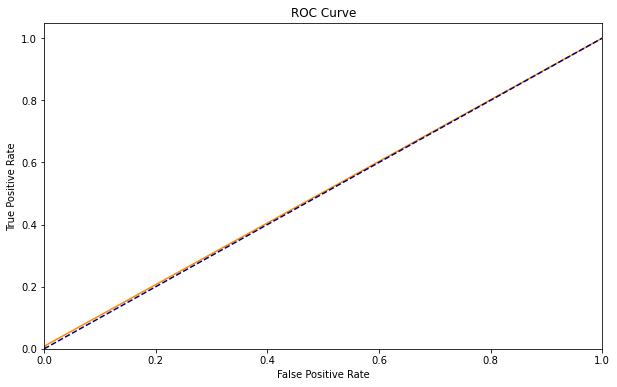

Brier Score:
1001.0


In [121]:
model_loss, model_accuracy = nn2.evaluate(X_test,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

test_proba = [x[0] for x in nn2.predict(X_test)]
test_preds = [round(x) for x in test_proba]
#test_preds_nn2 = test_preds.copy()
#test_proba = nn2.predict_proba(X_test)

output_test = f"""
METRICS FOR THE TESTING SET:
----------------------------
{confusion_matrix(y_test, test_preds)}

{classification_report(y_test, test_preds)}
"""
print(output_test)
print()
# print(test_preds)

#################################################

fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, test_proba)

roc_auc_knn = auc(fpr_knn, tpr_knn)
print(f"AUC for the Model Test Set: {roc_auc_knn}")

# make plot
plt.figure(figsize=(10,6))
plt.plot(fpr_knn, tpr_knn, color='darkorange')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

print("Brier Score:")
print(sum((y_test - test_proba)**2))

In [122]:
opt = tf.keras.optimizers.Adam(learning_rate=0.02)
nn2.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])
fit_model2_smote = nn2.fit(X_train_smote, y_train_smote, epochs=30, batch_size = 2048)

Epoch 1/30
24/24 [==============================] - 2s 5ms/step - loss: 319.7632 - accuracy: 0.4992
Epoch 2/30
24/24 [==============================] - 0s 6ms/step - loss: 23.3710 - accuracy: 0.5200
Epoch 3/30
24/24 [==============================] - 0s 8ms/step - loss: 3.3081 - accuracy: 0.5222
Epoch 4/30
24/24 [==============================] - 0s 8ms/step - loss: 0.9743 - accuracy: 0.4960
Epoch 5/30
24/24 [==============================] - 0s 5ms/step - loss: 0.7865 - accuracy: 0.5006
Epoch 6/30
24/24 [==============================] - 0s 6ms/step - loss: 0.7198 - accuracy: 0.5036
Epoch 7/30
24/24 [==============================] - 0s 6ms/step - loss: 0.7065 - accuracy: 0.5253
Epoch 8/30
24/24 [==============================] - 0s 5ms/step - loss: 0.6887 - accuracy: 0.5433
Epoch 9/30
24/24 [==============================] - 0s 7ms/step - loss: 0.6899 - accuracy: 0.5392
Epoch 10/30
24/24 [==============================] - 0s 5ms/step - loss: 0.6918 - accuracy: 0.5397
Epoch 11/30
24/2

222/222 - 1s - loss: 0.6997 - accuracy: 0.4864 - 805ms/epoch - 4ms/step
Loss: 0.6996572017669678, Accuracy: 0.48635655641555786
222/222 [==============================] - 1s 2ms/step

METRICS FOR THE TESTING SET:
----------------------------
[[2746 3326]
 [ 307  694]]

              precision    recall  f1-score   support

           0       0.90      0.45      0.60      6072
           1       0.17      0.69      0.28      1001

    accuracy                           0.49      7073
   macro avg       0.54      0.57      0.44      7073
weighted avg       0.80      0.49      0.56      7073



AUC for the Model Test Set: 0.6044112343519458


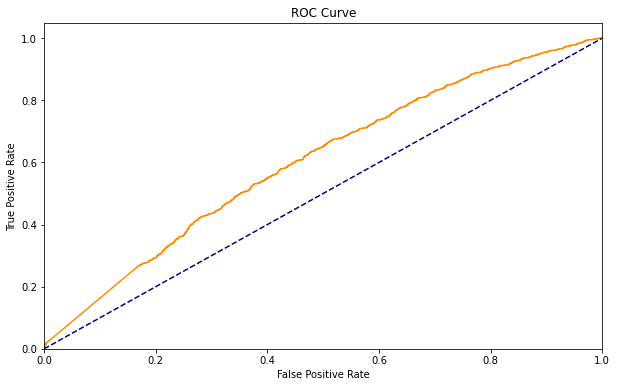

Brier Score:
1791.4763065226596


In [123]:
model_loss, model_accuracy = nn2.evaluate(X_test,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

test_proba = [x[0] for x in nn2.predict(X_test)]
test_preds = [round(x) for x in test_proba]
#test_preds_nn2 = test_preds.copy()
#test_proba = nn2.predict_proba(X_test)

output_test = f"""
METRICS FOR THE TESTING SET:
----------------------------
{confusion_matrix(y_test, test_preds)}

{classification_report(y_test, test_preds)}
"""
print(output_test)
print()
# print(test_preds)

#################################################

fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, test_proba)

roc_auc_knn = auc(fpr_knn, tpr_knn)
print(f"AUC for the Model Test Set: {roc_auc_knn}")

# make plot
plt.figure(figsize=(10,6))
plt.plot(fpr_knn, tpr_knn, color='darkorange')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

print("Brier Score:")
print(sum((y_test - test_proba)**2))

In [124]:
dfl2.groupby("loan_status").mean()

,id,loan_amnt,term,int_rate,installment,sub_grade,emp_length,annual_inc,issue_d,dti,delinq_2yrs,inq_last_6mths,open_acc,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,last_credit_pull_d_int
loan_status,,,,,,,,,,,,,,,,,,
0,680330.609144,10945.992341,41.346218,11.667236,321.645997,19.604740,4.955626,70084.351961,13.750551,13.281170,0.143280,0.837853,9.336029,13317.321599,0.479988,22.287578,0.037965,201437.830753
1,709277.727843,12285.506880,46.747066,13.930376,338.814334,27.595306,5.156617,63024.144616,12.592675,14.161042,0.165115,1.045730,9.307770,13681.540065,0.561603,21.728652,0.063132,201419.482800
